# Project 2D flat MNIST images to the sky sphere

In this notebook we show how to use NNhealpix's functions to project a 2D image on the sphere. It is useful to compare the performance of a 2D convolutional neural network and a NNhealpix neural network.

In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.keras
from tensorflow.keras.datasets import mnist

from nnhealpix.projections import img2healpix, img2healpix_planar

## Extract images from the MNIST dataset

We are going to discard `y_train` and the test dataset, as we are not interested in training neural networks in this notebook.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
img = x_train[1140]
img = img.reshape(1, 28, 28)
img_hp = img2healpix_planar(img, 128, 90, 0, 100, 100)

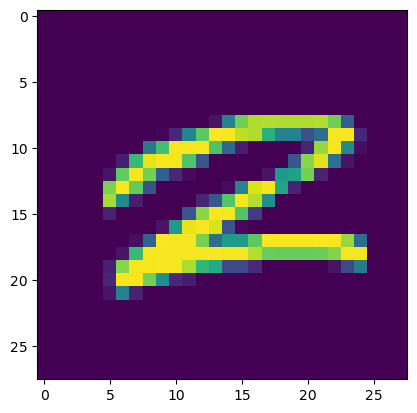

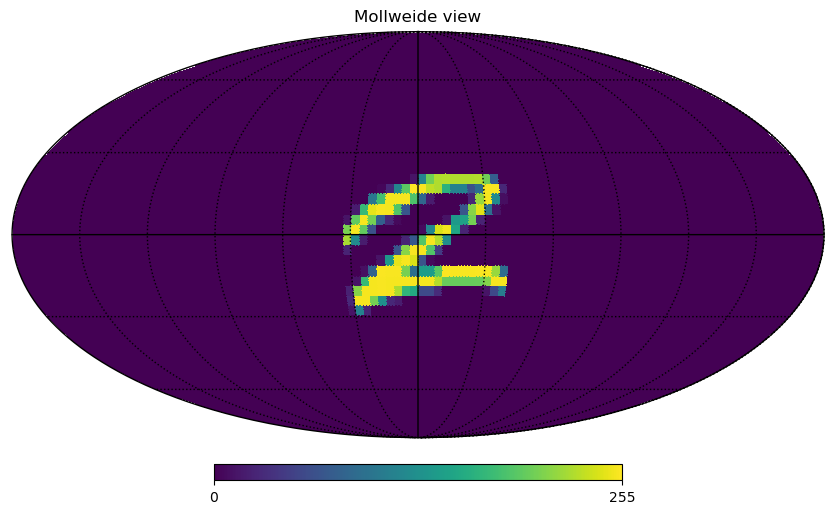

In [4]:
plt.imshow(img[0])
hp.mollview(img_hp[0])
hp.graticule()

As the `img2healpix` function projects images using ray-tracing, we plot here the projected image *and* the hit map generated by `img2healpix`. This is to check that all the pixel within the region covered by the image are filled, i.e., the projection leaves no gaps.

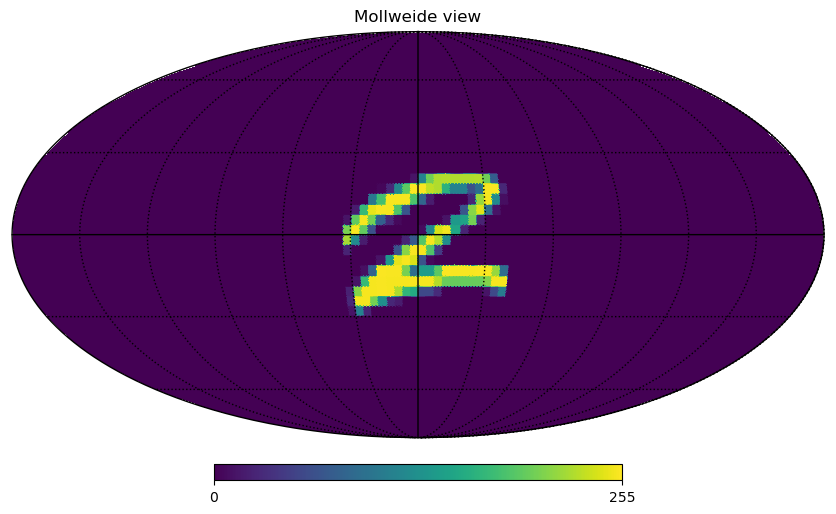

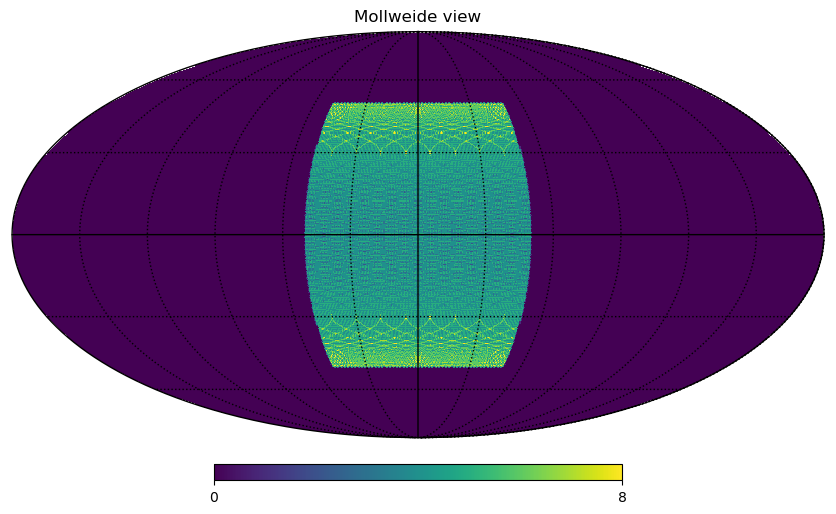

In [5]:
img_hp, img_hits = img2healpix(img[0], 128, 100, 100)

hp.mollview(img_hp)
hp.graticule()

hp.mollview(img_hits)
hp.graticule()

This is the same test as above, but in this case the image wraps around the pole.

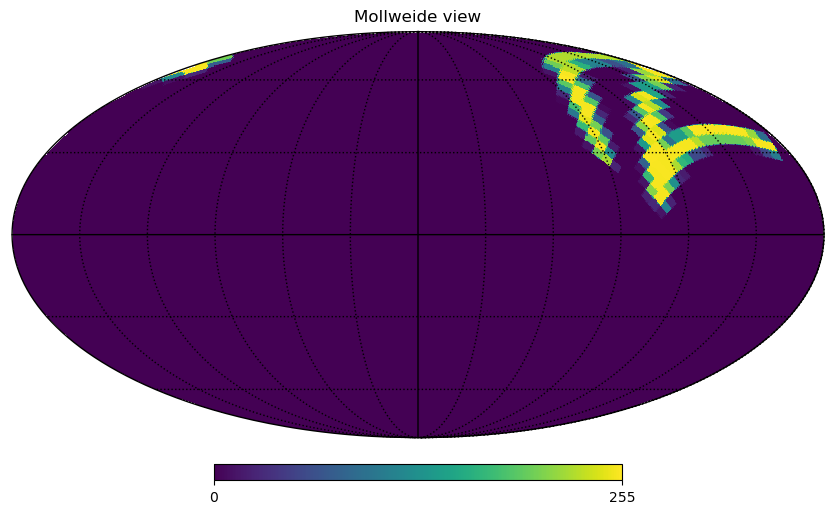

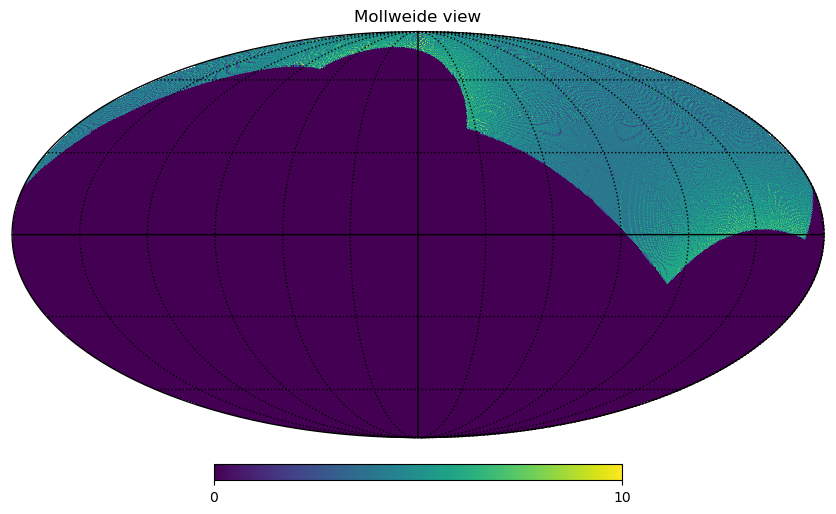

In [6]:
img_hp, img_hits = img2healpix(img[0], 128, 100, 100, rot=hp.rotator.Rotator(rot=(120.0, 45.0, 30.0)))

hp.mollview(img_hp)
hp.graticule()

hp.mollview(img_hits)
hp.graticule()

